##Using Convolutions with Complex Images

In the previous labs you used the Fashion MNIST dataset to train an image classifier. In this case you had images that were 28x28 where the subject was centered. In this lab you'll take this to the next level, training to recognize features in an image where the subject can be *anywhere* in the image!

You'll do this by building a horses-or-humans classifier that will tell you if a given image contains a horse or a human, where the network is trained to recognize features that determine which is which.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import os
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
        self.model.stop_training = True

In [15]:
# Directory with our training children and adult pictures
train_adults_dir = os.path.join('/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/train/adults')
train_children_dir = os.path.join('/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/train/children')

# Directory with our training children and adult pictures
test_adults_dir =   os.path.join('/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/test/adults')
test_children_dir = os.path.join('/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/test/children')

*Now*, let's see what the filenames look like in the `adults` and `children` training directories:

In [18]:
train_adults_names = os.listdir(train_adults_dir)
print(train_adults_names[:10])

train_children_names = os.listdir(train_children_dir)
print(train_children_names[:10])

['110.jpg', '113.jpg', '111.jpg', '107.jpg', '104.jpg', '102.jpg', '103.jpg', '106.jpg', '112.jpg', '108.jpg']
['122.jpg', '121.jpg', '123.jpg', '119.jpg', '118.jpg', '115.jpg', '116.jpg', '114.jpg', '117.jpg', '113.jpg']


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

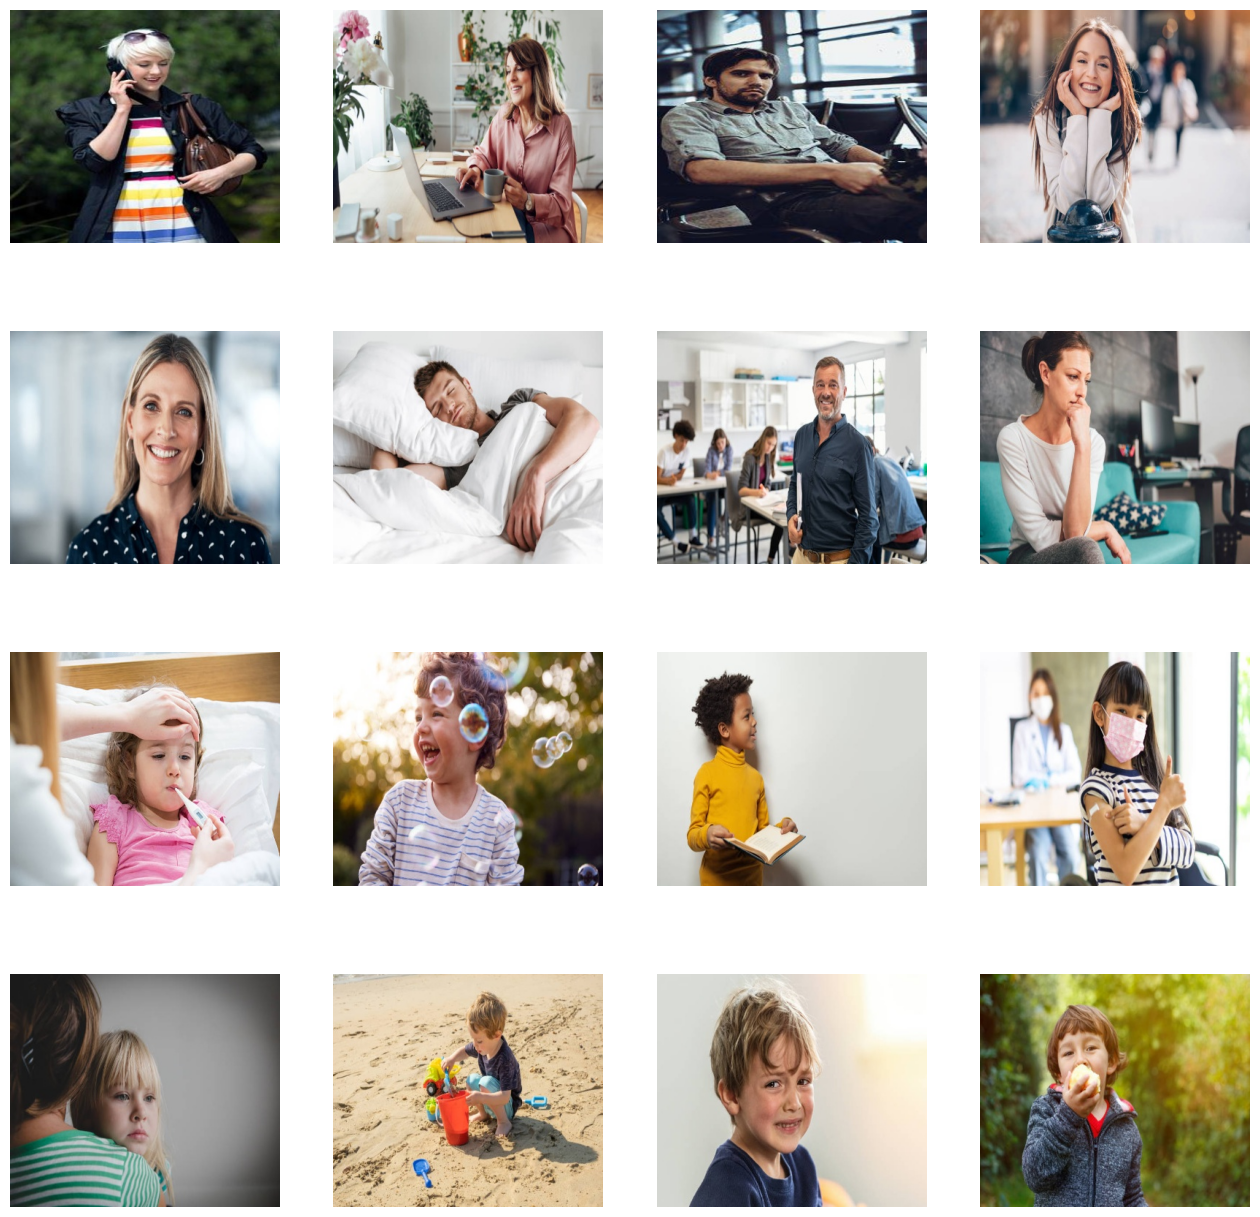

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_adult_pix = [os.path.join(train_adults_dir, fname)   for fname in train_adults_names[pic_index-8:pic_index]]
next_child_pix = [os.path.join(train_children_dir, fname) for fname in train_children_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_adult_pix + next_child_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [39]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 35, 35, 64)       

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/train",
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/ECOM09A/Google-Dev/children-adults/test",
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary')

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


### Training
Let's train for 15 epochs

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.

In [41]:
history = model.fit(train_generator, validation_data=test_generator, steps_per_epoch=5, epochs=15, verbose=1, validation_steps=5)

Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.4819 

5/5 [==============================] - 98s 19s/step - loss: 0.6926 - accuracy: 0.4819 - val_loss: 0.6573 - val_accuracy: 0.6167
Epoch 2/15
5/5 [==============================] - 88s 20s/step - loss: 0.6724 - accuracy: 0.5562
Epoch 3/15
5/5 [==============================] - 89s 20s/step - loss: 0.6863 - accuracy: 0.5217
Epoch 4/15
5/5 [==============================] - 103s 20s/step - loss: 0.6615 - accuracy: 0.6087
Epoch 5/15
5/5 [==============================] - 100s 20s/step - loss: 0.6710 - accuracy: 0.5734
Epoch 6/15
5/5 [==============================] - 91s 20s/step - loss: 0.6340 - accuracy: 0.6721
Epoch 7/15
5/5 [==============================] - 94s 18s/step - loss: 0.7108 - accuracy: 0.6250
Epoch 8/15
5/5 [==============================] - 121s 24s/step - loss: 0.6253 - accuracy: 0.6484
Epoch 9/15
5/5 [==============================] - 101s 20s/step - loss: 0.7892 - accuracy: 0.6047
Epoch 10/15
5/5 [==============================] - 89s 17s/step - loss: 0.7860 - accuracy: 0

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

You can download images from the internet to your file system to try them out!

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a adult")
  else:
    print(fn + " is a child")


Saving c1.jpeg to c1.jpeg
Saving c2.jpeg to c2.jpeg
Saving c3.jpeg to c3.jpeg
Saving c4.jpeg to c4.jpeg
Saving c5.jpeg to c5.jpeg
Saving c6.jpeg to c6.jpeg
1/1 [==============================] - 0s 283ms/step
[0.45210272]
c1.jpeg is a child
1/1 [==============================] - 0s 122ms/step
[0.6896753]
c2.jpeg is a adult
1/1 [==============================] - 0s 106ms/step
[0.5664795]
c3.jpeg is a adult
1/1 [==============================] - 0s 110ms/step
[0.43412748]
c4.jpeg is a child
1/1 [==============================] - 0s 144ms/step
[0.5557614]
c5.jpeg is a adult
1/1 [==============================] - 0s 140ms/step
[0.4693597]
c6.jpeg is a child
